In [239]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from deepface import DeepFace
from matplotlib import rcParams


%matplotlib inline


In [240]:
image_path = "images"
img1_path = f"{image_path}/radu_1.jpg"
img2_path = f"{image_path}/radu_2.jpg"
# img2_path = f"{image_path}/daniela_1.jpg"
# img2_path = f"{image_path}/daniela_2.jpg"
# img2_path = f"{image_path}/bradp_1.jpeg"
result = DeepFace.verify(img1_path = img1_path, img2_path = img2_path)


In [241]:
print(result)
print(type(result))


{'verified': True, 'distance': 0.11298040906070095, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 577, 'y': 147, 'w': 320, 'h': 320}, 'img2': {'x': 568, 'y': 132, 'w': 296, 'h': 296}}, 'time': 0.74}
<class 'dict'>


In [242]:
def draw_face_rectangle(image, facial_areas, color=(250, 75, 80), thickness=3):
    x0 = facial_areas['x']
    x1 = x0 + facial_areas['w']
    y0 = facial_areas['y']
    y1 = y0 + facial_areas['h']
    cv.line(image,(x0,y0),(x1,y0),color,thickness)
    cv.line(image,(x1,y0),(x1,y1),color,thickness)
    cv.line(image,(x0,y1),(x1,y1),color,thickness)
    cv.line(image,(x0,y1),(x0,y0),color,thickness)
    return image


In [243]:
def image_resize(image, width = None, height = None, inter = cv.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]
    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))

    resized = cv.resize(image, dim, interpolation = inter)

    return resized

In [244]:
verification_colors = {
    True: (63, 173, 50),
    False: (250, 75, 80)
}


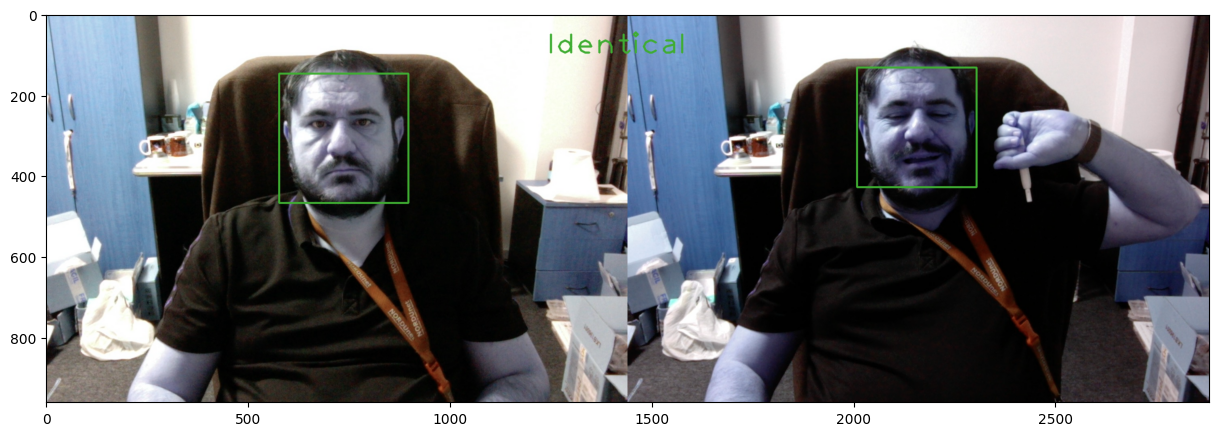

In [245]:

color = verification_colors[result['verified']]
img1 = cv.imread(img1_path)
img1 = draw_face_rectangle(img1, result['facial_areas']['img1'], color=color)
img2 = cv.imread(img2_path)
img2 = draw_face_rectangle(img2, result['facial_areas']['img2'], color=color)
img2 = image_resize(img2, width=img1.shape[1])

image_concat = cv.hconcat([img1, img2])
font = cv.FONT_HERSHEY_PLAIN
cv.putText(image_concat, 
            ("Not identical", "Identical")[result['verified']], 
            (int(image_concat.shape[1]/2)-200,100), font, 5, color, 4, cv.LINE_AA)
rcParams['figure.figsize'] = 15 ,9
plt.imshow(image_concat)


In [246]:
img3_path = f"{image_path}/radu_1.jpg"
img3_path = f"{image_path}/bradp_1.jpeg"
img3_path = f"{image_path}/angelina_1.jpg"
# img3_path = f"{image_path}/dragos_1.jpg"
#img3_path = f"{image_path}/dragos_2.jpg"
img3_path = f"{image_path}/daniela_1.jpg"
img3_path = f"{image_path}/daniela_2.jpg"
img3_path = f"{image_path}/daniela_3.jpg"
img3_path = f"{image_path}/oldman_1.jpg"

result_analyze = DeepFace.analyze(
    img3_path,
    actions=("emotion", "age", "gender", "race"),
    enforce_detection=True,
    detector_backend="opencv",
    align=True,
    silent=False,
)
result_analyze = result_analyze[0]
result_analyze

Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]  


{'emotion': {'angry': 0.02092618524329737,
  'disgust': 4.1816934981397935e-05,
  'fear': 0.7368810009211302,
  'happy': 46.46807909011841,
  'sad': 0.23848810233175755,
  'surprise': 0.010351914534112439,
  'neutral': 52.52523422241211},
 'dominant_emotion': 'neutral',
 'region': {'x': 642, 'y': 316, 'w': 310, 'h': 310},
 'age': 32,
 'gender': {'Woman': 99.99996423721313, 'Man': 4.143967373693158e-05},
 'dominant_gender': 'Woman',
 'race': {'asian': 0.00019990841337858,
  'indian': 0.001072370469046291,
  'black': 1.0466801114716873e-05,
  'white': 97.85182476043701,
  'middle eastern': 1.489594578742981,
  'latino hispanic': 0.6572972983121872},
 'dominant_race': 'white'}

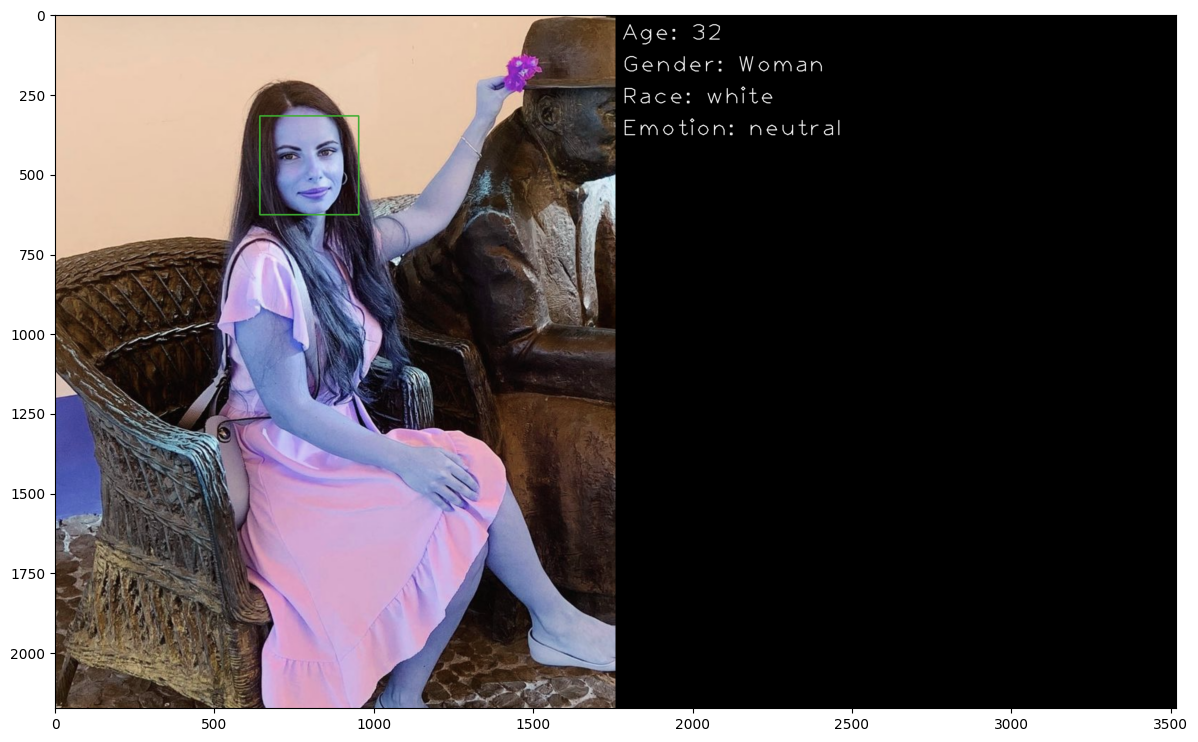

In [247]:
img3 = cv.imread(img3_path)
img3 = draw_face_rectangle(img3, result_analyze['region'], color=(63, 173, 50))
img_label_box = np.zeros(img3.shape, np.uint8)
text_labels = [
    f"Age: {result_analyze['age']}",
    f"Gender: {result_analyze['dominant_gender']}",
    f"Race: {result_analyze['dominant_race']}",
    f"Emotion: {result_analyze['dominant_emotion']}"
]
tl_point = (20,80)
for tl in text_labels:
    cv.putText(img_label_box, tl, tl_point, 
               cv.FONT_HERSHEY_PLAIN, 5, (255,255,255), 2, cv.LINE_AA)
    tl_point = (tl_point[0], tl_point[1]+100)

image_concat = cv.hconcat([img3, img_label_box])

plt.imshow(image_concat)
